# **Análise Exploratória dos Filmes TMDB 5000**
*Desvendando o que faz um filme ser um sucesso*




---
# **Introdução**

O cinema é mais do que entretenimento, é uma indústria bilionária que combina arte, negócios e cultura.
Mas afinal, o que torna um filme realmente bem-sucedido?
Será o gênero? O idioma? O estúdio que o produz? Ou o quanto ele é popular entre o público?

Nesta análise exploratória, mergulharemos em um conjunto de 5.000 filmes do banco de dados TMDB (The Movie Database) para responder a perguntas fundamentais sobre o desempenho e o impacto dos filmes.

Nosso objetivo é entender o que impulsiona o sucesso financeiro, a recepção crítica e a popularidade, revelando padrões que ajudam a explicar o funcionamento da indústria cinematográfica moderna.

---



# **Objetivos do Projeto:**

-  Quais são os filmes mais lucrativos?

- Como se distribuem as avaliações médias por gênero?

- Como evoluiu a produção de filmes ao longo das décadas?

- Quais são os filmes mais populares?

- Quais idiomas dominaram os maiores lucros?

- Quais empresas concentram o maior lucro da indústria?

*Cada uma dessas perguntas será respondida por meio de visualizações, estatísticas e interpretações, formando uma história coerente sobre os bastidores do sucesso no cinema.*

# **1**. ***Importação das bibliotecas e leitura dos dados***
>O ponto de partida de toda análise é conhecer o material com que se está trabalhando.
Aqui vamos carregar o dataset, inspecionar sua estrutura e identificar colunas relevantes.

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import ast

# Configurações visuais dos graficos
sns.set(style="whitegrid", palette="viridis")
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

# Carregando o dataset
df = pd.read_csv('tmdb_5000_movies.csv')

# Visualização inicial
display(df.head(2))
print(df.info())
print(f"Dimensão do dataset: {df.shape}")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

# ***2. Limpeza e tratamento de dados***


>Dados limpos são a base de qualquer insight confiável.
Aqui tratamos nulos, padronizamos formatos e criamos colunas auxiliares para facilitar a análise.

 *A maior parte dos nulos está concentrada em colunas não críticas (como homepage e tagline), o que não compromete a análise.*











In [194]:
# Converter datas
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', infer_datetime_format=True)

# Remover nulos em colunas críticas
df = df.dropna(subset=['overview', 'release_date'])
df['runtime'] = df['runtime'].fillna(0)

# Criar indicadores binários
df['tem_homepage'] = df.homepage.notnull().astype(int)
df['tem_tagline'] = df.tagline.notnull().astype(int)

# Remover duplicatas
df = df.drop_duplicates()

print("Dados limpos com sucesso!")
print(df.isnull().sum())

Dados limpos com sucesso!
budget                     0
genres                     0
homepage                3087
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  840
title                      0
vote_average               0
vote_count                 0
tem_homepage               0
tem_tagline                0
dtype: int64


/tmp/ipython-input-2005741180.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', infer_datetime_format=True)


# **3. Filmes mais lucrativos**

>O lucro é o indicador mais direto do sucesso comercial.
Vamos identificar os filmes com maiores retornos financeiros.





Franquias e blockbusters como Avatar e Avengers dominam o ranking.
Esses filmes combinam grandes orçamentos com marketing massivo e apelo global, provando que investimento e retorno caminham juntos.


/tmp/ipython-input-2473307024.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Lucro', y='original_title', data=top_lucros, palette='YlGnBu')
/tmp/ipython-input-2473307024.py:15: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


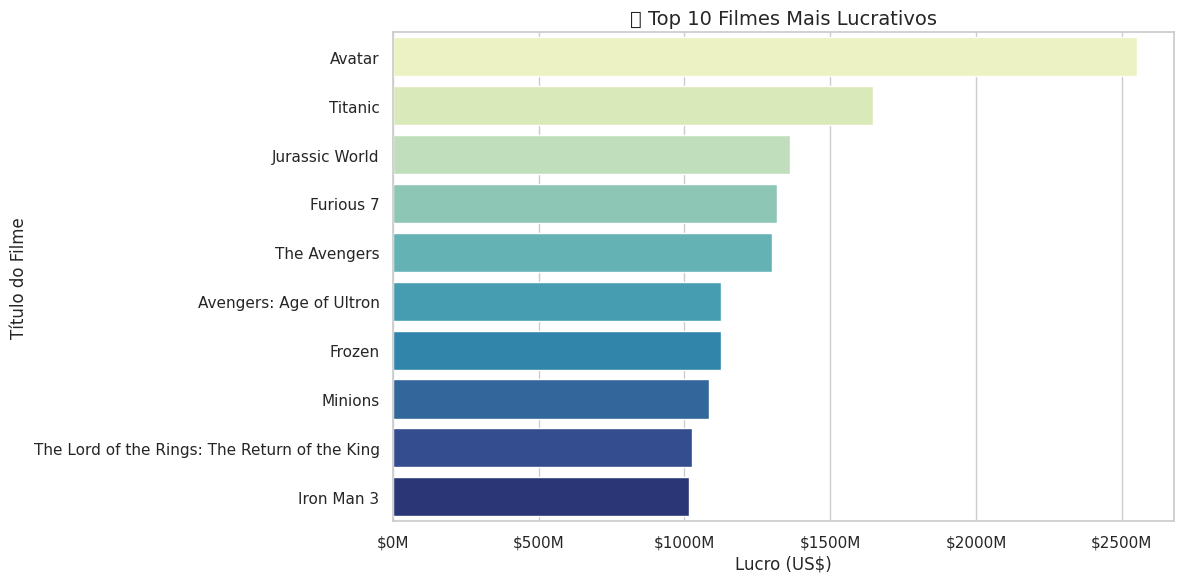

,original_title,budget,revenue,Lucro
0,Avatar,237000000,2787965087,2550965087
25,Titanic,200000000,1845034188,1645034188
28,Jurassic World,150000000,1513528810,1363528810
44,Furious 7,190000000,1506249360,1316249360
16,The Avengers,220000000,1519557910,1299557910
7,Avengers: Age of Ultron,280000000,1405403694,1125403694
124,Frozen,150000000,1274219009,1124219009
546,Minions,74000000,1156730962,1082730962
329,The Lord of the Rings: The Return of the King,94000000,1118888979,1024888979
31,Iron Man 3,200000000,1215439994,1015439994


In [195]:
df['Lucro'] = df['revenue'] - df['budget']
df['Foi_lucrativo'] = df['revenue'] > df['budget'] * 2

# Top 10
top_lucros = df.sort_values(by='Lucro', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Lucro', y='original_title', data=top_lucros, palette='YlGnBu')
plt.title("💰 Top 10 Filmes Mais Lucrativos")
plt.xlabel("Lucro (US$)")
plt.ylabel("Título do Filme")

ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x/1_000_000:.0f}M"))
plt.tight_layout()
plt.show()

top_lucros[['original_title', 'budget', 'revenue', 'Lucro']].head(10)

# ***4. Média de avaliação por gênero***
>Nem todo sucesso é financeiro, muitos filmes são reconhecidos pela crítica e pelo público.
Vamos descobrir quais gêneros recebem as melhores notas médias.

Gêneros como Documentário e História tendem a ter melhores notas, mostrando que filmes de nicho, mesmo com menos apelo comercial, são mais bem avaliados criticamente.


/tmp/ipython-input-1084293063.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_avaliacao_porGenero.index, y=media_avaliacao_porGenero.values, palette='magma')
/tmp/ipython-input-1084293063.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


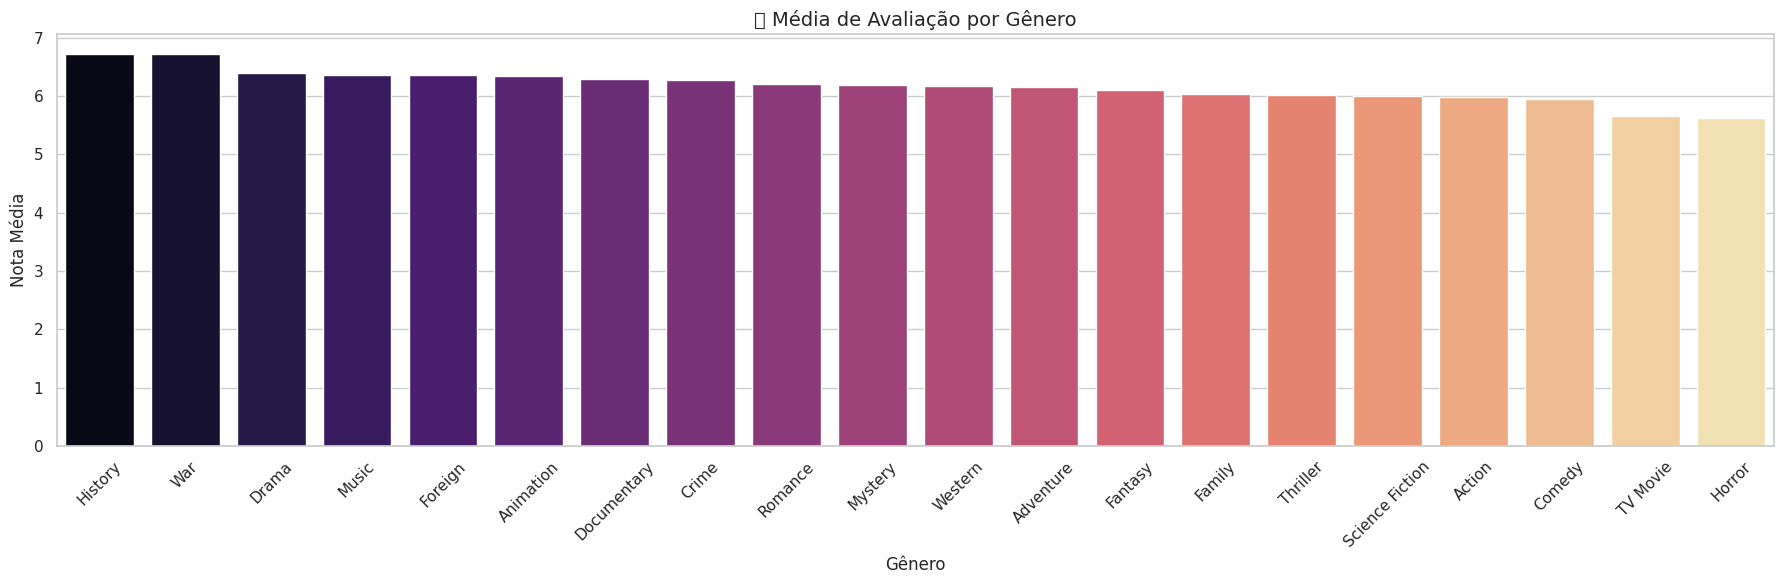

,vote_average
gênero,
History,6.7
War,6.7
Drama,6.4
Music,6.4
Foreign,6.4
Animation,6.3
Documentary,6.3
Crime,6.3
Romance,6.2


In [196]:
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
df['gênero'] = df['genres'].apply(lambda x: [d['name'] for d in x])

df_explode = df.explode('gênero')
media_avaliacao_porGenero = df_explode.groupby('gênero')['vote_average'].mean().sort_values(ascending=False)

plt.figure(figsize=(18,6))
sns.barplot(x=media_avaliacao_porGenero.index, y=media_avaliacao_porGenero.values, palette='magma')
plt.title("📊 Média de Avaliação por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Nota Média")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

media_avaliacao_porGenero.round(1)

# ***5. Evolução da produção de filmes ao longo dos anos***
>O cinema está em constante transformação.
Analisaremos como a produção de filmes evoluiu ao longo das décadas.

A partir dos anos 2000, há uma explosão na produção — reflexo do avanço das tecnologias digitais e da popularização de plataformas de streaming.



/tmp/ipython-input-3878818618.py:9: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


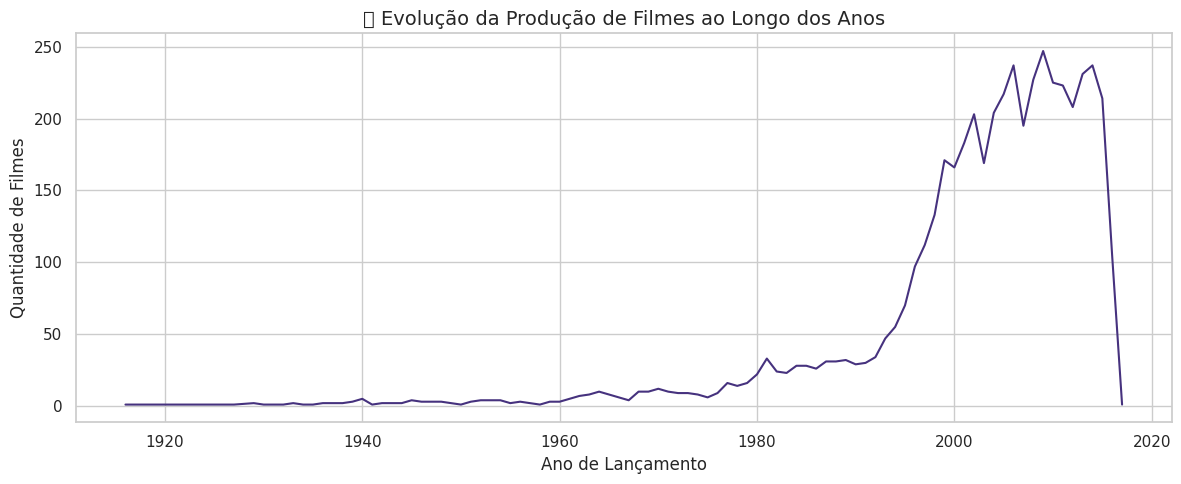

In [197]:
df['Ano_de_lancamento'] = df['release_date'].dt.year
producao_por_ano = df.groupby('Ano_de_lancamento').size()

plt.figure(figsize=(12,5))
sns.lineplot(x=producao_por_ano.index, y=producao_por_ano.values)
plt.title("🎬 Evolução da Produção de Filmes ao Longo dos Anos")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Quantidade de Filmes")
plt.tight_layout()
plt.show()

# ***6. Índice de popularidade por filme***
>Popularidade é uma medida de engajamento.
Vamos identificar os filmes que mais atraíram a atenção do público.

Os filmes mais populares nem sempre são os mais lucrativos, popularidade tende a refletir o engajamento online e relevância cultural, não necessariamente o retorno financeiro.

In [198]:
df['popularidade_pct'] = df['popularity'] / df['popularity'].max() * 100
indice_popularidade = df[['title', 'popularidade_pct']].sort_values(by='popularidade_pct', ascending=False)
indice_popularidade.head(10).style.format({'popularidade_pct': '{:.2f}%'})

,title,popularidade_pct
546,Minions,100.00%
95,Interstellar,82.72%
788,Deadpool,58.77%
94,Guardians of the Galaxy,54.95%
127,Mad Max: Fury Road,49.60%
28,Jurassic World,47.82%
199,Pirates of the Caribbean: The Curse of the Black Pearl,31.06%
82,Dawn of the Planet of the Apes,27.84%
200,The Hunger Games: Mockingjay - Part 1,23.55%
88,Big Hero 6,23.27%


# ***7. Idiomas com filmes mais lucrativos***
>O idioma pode revelar a influência cultural e econômica de um país no cinema.

O domínio do inglês é absoluto, reforçando a liderança de Hollywood.
Entretanto, a presença crescente de filmes em chinês e espanhol indica uma diversificação global do mercado cinematográfico.

/tmp/ipython-input-3832852781.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=idioma_mais_lucrativo.index, y=idioma_mais_lucrativo.values, palette='coolwarm')
/tmp/ipython-input-3832852781.py:10: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


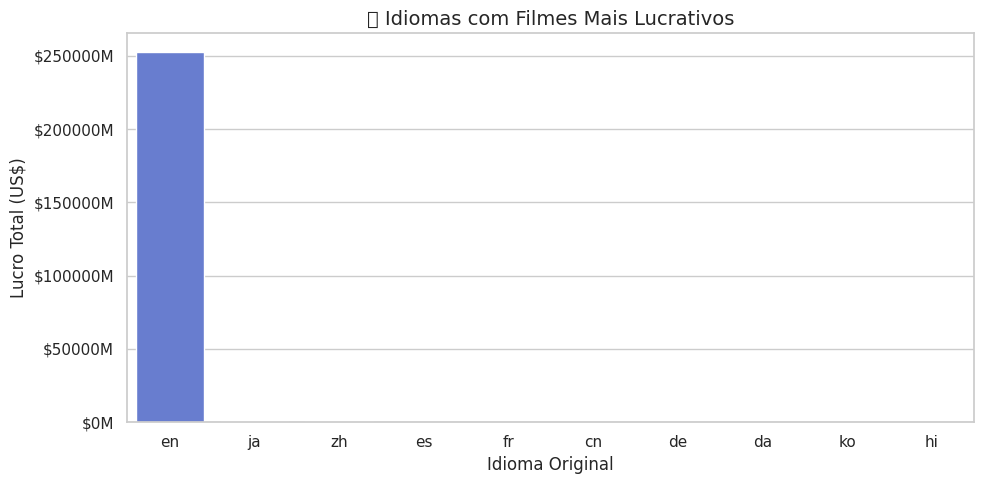

,Lucro
original_language,
en,"R$252,660,622,108.00"
ja,"R$827,764,950.00"
zh,"R$532,153,343.00"
es,"R$409,743,843.00"
fr,"R$278,636,133.00"
cn,"R$276,164,917.00"
de,"R$145,242,894.00"
da,"R$141,092,216.00"
ko,"R$121,720,936.00"


In [199]:
idioma_mais_lucrativo = df.groupby('original_language')['Lucro'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=idioma_mais_lucrativo.index, y=idioma_mais_lucrativo.values, palette='coolwarm')
plt.title("🌎 Idiomas com Filmes Mais Lucrativos")
plt.xlabel("Idioma Original")
plt.ylabel("Lucro Total (US$)")
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x/1_000_000:.0f}M"))
plt.tight_layout()
plt.show()

idioma_mais_lucrativo.map('R${:,.2f}'.format)

# ***8. Empresas mais lucrativas***
>Por trás de cada sucesso há uma empresa que domina o mercado.

Vamos descobrir quais são os gigantes da indústria.
Os estúdios como Walt Disney Pictures, Warner Bros. e Universal lideram amplamente o ranking, consolidando o domínio dos grandes conglomerados sobre o mercado global.

/tmp/ipython-input-2417023976.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=empresas_mais_lucrativas.values, y=empresas_mais_lucrativas.index, palette='viridis')
/tmp/ipython-input-2417023976.py:14: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


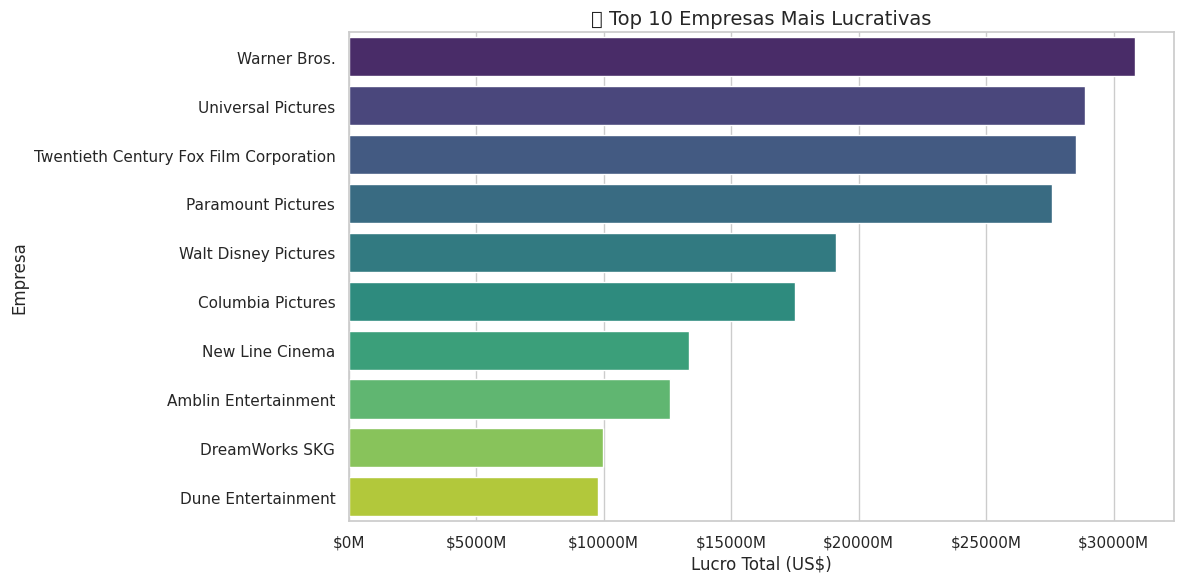

,Lucro
Empresas,
Warner Bros.,"R$30,827,753,925.00"
Universal Pictures,"R$28,880,599,669.00"
Twentieth Century Fox Film Corporation,"R$28,529,983,509.00"
Paramount Pictures,"R$27,568,910,158.00"
Walt Disney Pictures,"R$19,099,976,048.00"
Columbia Pictures,"R$17,490,360,039.00"
New Line Cinema,"R$13,349,380,804.00"
Amblin Entertainment,"R$12,587,035,147.00"
DreamWorks SKG,"R$9,966,033,626.00"


In [200]:
df['production_companies'] = df['production_companies'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
df['Empresas'] = df['production_companies'].apply(lambda x: [d['name'] for d in x])
df_explode2 = df.explode('Empresas')

empresas_mais_lucrativas = df_explode2.groupby('Empresas')['Lucro'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=empresas_mais_lucrativas.values, y=empresas_mais_lucrativas.index, palette='viridis')
plt.title("🏢 Top 10 Empresas Mais Lucrativas")
plt.xlabel("Lucro Total (US$)")
plt.ylabel("Empresa")
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x/1_000_000:.0f}M"))
plt.tight_layout()
plt.show()

empresas_mais_lucrativas.map('R${:,.2f}'.format)

# **Conclusão** **Geral**

---



 ***Principais descobertas:***

- O inglês domina o cinema mundial em lucro e popularidade.

- A produção aumentou fortemente após os anos 2000, impulsionada pela tecnologia digital.

- Gêneros como documentário e história têm as melhores avaliações, mas não os maiores lucros.

- Poucos estúdios dominam o mercado, mostrando forte concentração de poder econômico.


---
# **Encerramento**

O cinema é um reflexo da sociedade, e ao analisar seus dados, percebemos como ele combina arte, cultura e negócio.
Cada gráfico revelou uma faceta diferente dessa indústria: do glamour dos blockbusters à força dos filmes independentes.

Mais do que números, essa análise conta uma história sobre como o cinema evolui, se adapta e continua encantando o mundo.
